In [23]:
import pandas as pd
data = pd.read_csv('../Data/entertainment_clean.csv')
data.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [24]:
df = data.drop(columns = ['name'])
df.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [25]:
df.shape

(150, 3)

In [26]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.02)

iso_forest.fit(df)

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


In [18]:
iso_forest.decision_function(df)

array([ 1.97376546e-01,  1.04552992e-01,  1.92373896e-01,  1.80112209e-01,
        1.64897203e-01,  1.48757418e-01,  1.89957875e-01,  1.94154839e-01,
        1.12027762e-01,  1.88696980e-01,  9.21338106e-02,  1.83149454e-01,
        1.93023956e-01,  2.03369393e-01,  1.90967437e-01, -2.56831522e-02,
        2.00845547e-01,  2.18037356e-01,  9.07995741e-02,  4.50421643e-03,
        1.60680842e-01,  1.11267165e-01,  1.99209781e-01,  1.58008664e-01,
        1.90217461e-01,  2.01838729e-01,  1.01584358e-01,  1.57563318e-01,
        1.64576663e-01, -2.38990523e-03,  2.03745955e-01,  9.27905662e-02,
        1.05902108e-01,  1.63254172e-01,  1.45165540e-01,  1.80316263e-01,
        1.61648683e-01,  9.64821728e-04,  1.62613663e-01,  1.87225464e-01,
        1.38725698e-01,  1.69350074e-01,  2.17482206e-02,  1.31308362e-01,
        1.78307138e-01,  1.83171123e-01,  2.14474155e-01,  1.40104520e-01,
        1.95421095e-01,  6.53408007e-02,  1.38943607e-01,  1.61598972e-01,
        1.11574698e-01,  

In [27]:
# save it in the df
# Get anomaly scores and predictions
anomaly_scores = iso_forest.decision_function(df)
anomalies = iso_forest.predict(df)

In [28]:
df['anomaly_scores'] = anomaly_scores
df['anomalies'] = anomalies

In [33]:
df.sort_values('anomaly_scores', ascending = True)

,books,tv_shows,video_games,anomaly_scores,anomalies
110,5.0,5.7,7.9,-0.034613,-1
15,1.0,6.6,5.7,-0.024170,-1
37,0.8,3.4,4.5,-0.022044,-1
147,5.5,5.7,7.7,0.000450,1
148,0.0,6.1,5.2,0.006247,1
...,...,...,...,...,...
77,4.5,4.5,6.1,0.234244,1
116,3.8,4.2,6.3,0.234656,1
30,3.2,4.4,5.7,0.234996,1
72,3.2,4.2,5.7,0.238851,1


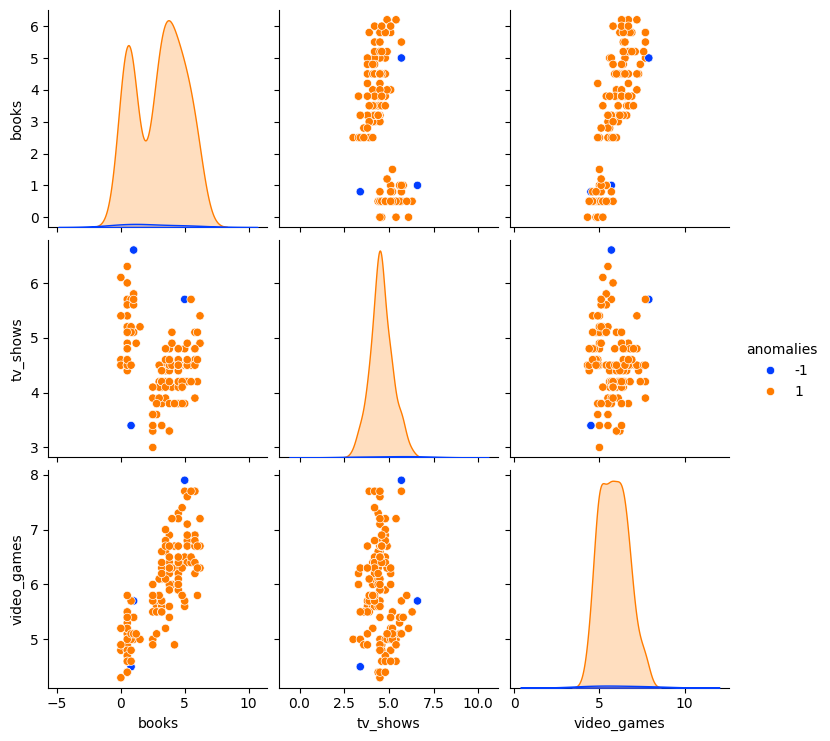

In [37]:
import seaborn as sns
sns.pairplot(df.drop(columns = ['anomaly_scores']), hue= 'anomalies', palette= 'bright')